# Exercise normal equations for the Boston dataset

In exercise we build regression models on the Boston housing dataset.

In [3]:
%matplotlib inline
import sklearn.datasets
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import PolynomialFeatures

sns.set_context("poster")
plt.style.use('fivethirtyeight')
matplotlib.style.use('fivethirtyeight') 
plt.rcParams['figure.figsize'] = (10, 6)
scatter_size = 60

#Load boston dataset
boston = sklearn.datasets.load_boston()

def feature_normalize(dataset):
    mu = np.mean(dataset,axis=0)
    sigma = np.std(dataset,axis=0)
    return (dataset - mu)/sigma

X = feature_normalize(boston.data)
Y = boston.target[:, np.newaxis]

## Base model

Take a constant hypothesis, constant, equal to the mean.  
Calculate the MAPE (mean percentage error)  
Calculate the mean square loss

In [4]:
y_hat = Y.mean()
print("Mape: {:3.1f}%".format(100*(np.abs(Y-y_hat)/Y).mean()))
print("MSS:  {:3.1f}".format((np.square(Y-y_hat)).mean()))

Mape: 36.3%
MSS:  84.4


## Normal equations

$$
\boldsymbol \theta = (X^\top X)^{-1}X^\top Y
$$

## Class for normal equation regression

In [7]:
class NormalModel(object):
    def __init__(self, lambda_reg=None):
        self.theta_hat = None
        self.lambda_reg = lambda_reg
    
    def train(self, X_train, Y_train):
        Y = Y_train
        X_bias = np.append(X_train, np.ones((len(X_train), 1)), axis=1)
        inverse = np.linalg.pinv(X_bias.transpose().dot(X_bias))
        self.theta_hat = inverse.dot(X_bias.transpose().dot(Y_train))
    
    def predict(self, X_batch):
        X_bias = np.append(X_batch, np.ones((len(X_batch), 1)), axis=1)
        return X_bias.dot(self.theta_hat)
    
    def score(self, X_batch, Y_batch):
        y_hat = self.predict(X_batch)
        mape = 100 * (np.abs(Y_batch-y_hat)/Y).mean()
        mss =  (np.square(Y_batch-y_hat)).mean()
        print("Mape: {:05.2f}%".format(mape))
        print("MSS:  {:04.2f}".format(mss))
        
    def plot_theta(self):
        pd.Series(self.theta_hat[:, 0]).plot(kind='bar')
        plt.title("Coefficients")
        plt.ylabel("Value")
        plt.xlabel("Index")
        
    def hist_theta(self):
        plt.hist(self.theta_hat[:, 0])
        plt.title("Histogram of coefficients")
        plt.xlabel("Value of coefficient")
        plt.ylabel("Number of coefficients")

## Linear regression

Mape: 16.43%
MSS:  21.90


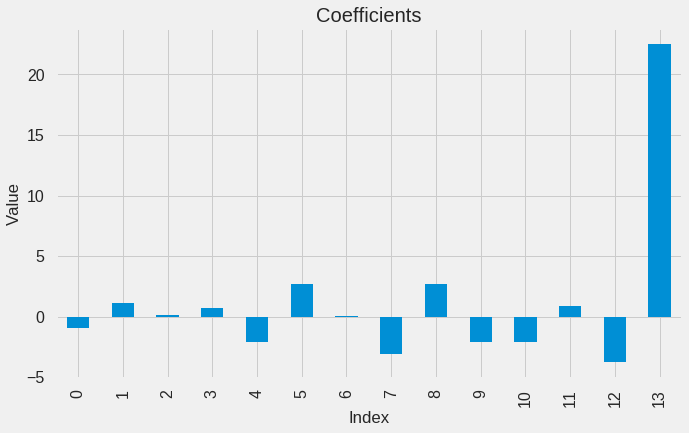

In [8]:
model = NormalModel()
model.train(X, Y)
model.score(X, Y)
model.plot_theta()

## Quadratic regression

In [9]:
poly2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly2 = poly2.fit_transform(boston.data)
X_poly2 = feature_normalize(X_poly2)

Mape: 09.37%
MSS:  5.98


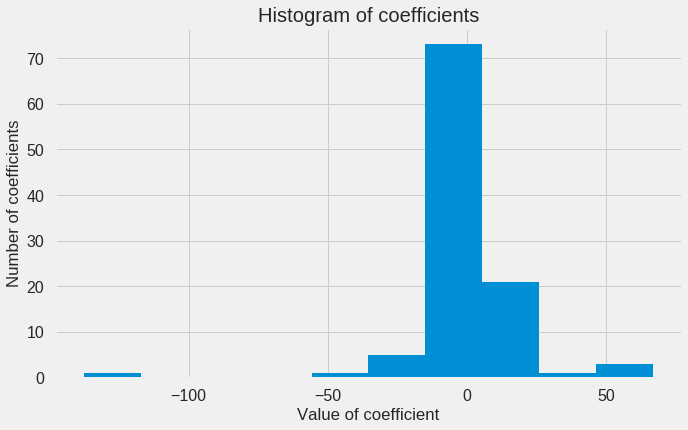

In [10]:
model = NormalModel()
model.train(X_poly2, Y)
model.score(X_poly2, Y)
model.hist_theta()

## Cubic Regression

In [11]:
poly3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly3 = poly3.fit_transform(boston.data)
X_poly3 = feature_normalize(X_poly3)

In [12]:
X_poly3.shape

(506, 559)

Mape: 01.34%
MSS:  0.21


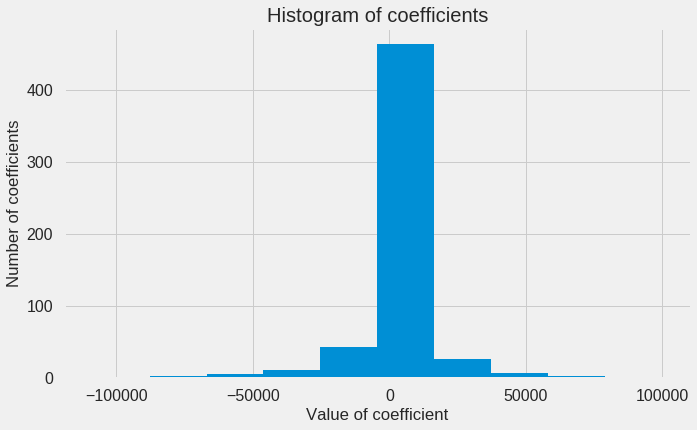

In [13]:
model = NormalModel()
model.train(X_poly3, Y)
model.score(X_poly3, Y)
model.hist_theta()

# Exercises
For these exercises your task is to extend and improve the above notebook. Do not provide a list with answers, but try to answer these questions within the above notebook. Turn this notebook into a story. 

You are free to change code, to add explanations, and to add plots, and even re-organize the sections; everything to make it a better read. If you don't know how to add text, headers, etc in Jupyter notebooks, you find some useful links on the Python preparation page. Presentation will be an important part of the score for this assignment.   

You can write your notebook in Dutch or English.


## Polynomial regression
1. Comment, somewhere in the notebook, on the number of features for the different orders of the polynomial regression.
1. Also explain also how the polynomial terms are constructed, and how you come to this number of features

## Validation set


1. Observe what happens in the code above. Why do we need to split our data into a train and validation set? Use some plots to explain this. 
1. Split the data into a validation set and a test set
1. Train the model on the training set and evaluate it on the test set. Do this for all the examples (linear, polynomial, quadratic, cubic) in the above notebook.
1. Present (somewhere) in your notebook a table with train and validation scores [Markdown table](http://www.tablesgenerator.com/markdown_tables) is a tool that can help you creating tables. Double click on this cell to see how the below example table is made


| **Model**  | **Train score** | **Validation score** |
|------------|-----------------|----------------|
| Linear     |                 |                |
| Quadratic  |                 |                |
| Polynomial |                 |                |




## Ridge regression
With Ridge regression, we add to the cost function a quadratic penalty on the coefficients. During the lectures you saw that how the normal equations change as a result of this new term.
1. Modify the class `NormalRegression` to solve the normal equations of ridge regression
2. For the above three polynomial degrees, use ridge regression to find a better fit to the data. Explain in your notebook how you use the validation dataset and how you find a good value of $\lambda$
3. What is the effect of the regularization the the size of the coefficients? Explain and show this with plots in your notebook.
3. Conclude your notebook by recommending a model, including a value for $\lambda$. For clarity, include a table which summarizes the performance of various models.